# INF283 | Weekly Exercise 02 | Regression

## Table of Contents:
[1. Univariate Linear Regression](#univariate)
  * [Exercise 1.1](#exercise1_1)

  * [Exercise 1.2](#exercise1_2)

  * [Exercise 1.3](#exercise1_3)

  * [Exercise 1.4](#exercise1_4)

  * [Exercise 1.5](#exercise1_5)

[2. Multivariate Linear Regression](#multivariate)
  
  * [Exercise 2.1](#exercise2_1)
  
  * [Exercise 2.2](#exercise2_2)
  
  * [Exercise 2.3](#exercise2_3)

[3. Logistic Regression](#logistic)

  * [Exercise 3.1](#exercise3_1)


# 1. Univariate Linear Regression <a class="anchor" id="univariate"></a> 

# Linear Regression with Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

### Finding the mean squared error (MSE)

In [2]:
# We are now going to define a function which takes the parameters (w0 and w1) of 
# a line and then finds the mean-squared error between the user-specified points 
# and the line. 
def compute_error_for_line_given_points(w0, w1, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        # accumulate 'sum of square' errors in totalError variable
        totalError += (y - (w1 * x + w0)) ** 2
    # find mean of sum of squared errors    
    mse = totalError/len(points)
    return mse

# N.B.: Students who wish to do this excercise in R should implement this function in R themselves

### Gradient Descent

In [3]:
def step_gradient(w0_current, w1_current, points, learningRate):
    #initialize the partial derivatives for the cummlative sum
    w0_par_der = 0
    w1_par_der = 0
    
    n = len(points)
    
    # computation for the summation
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        # partial derivative (of MSE) with respect to w0
        w0_par_der += (y - ((w1_current * x) + w0_current))
        # partial derivative (of MSE) with respect to w1
        w1_par_der += x * (y - ((w1_current * x) + w0_current))
        
    # multiplcation of summation results with -2/n
    w0_par_der = -(2/n) * w0_par_der
        # partial derivative (of MSE) with respect to w1
    w1_par_der = -(2/n) * w1_par_der
         
    # make a gradient vector from the partial derivatives    
    gradient_mse = np.array([w0_par_der, w1_par_der])
    
    # make a vector of weights
    weight_vector = np.array([w0_current, w1_current])
    
    # update rule for weights
    updated_weight_vector = weight_vector - (learningRate * gradient_mse)
    
    # return the updated weight vector as a list
    return np.ndarray.tolist(updated_weight_vector)

# N.B. Students who wish to do this excercise in R should implement this function in R themselves

### Running Gradient Descent Iteratively

In [4]:
def gradient_descent_runner(points, starting_w0, starting_w1, learning_rate, num_iterations):
    w0 = starting_w0
    w1 = starting_w1
    for i in range(num_iterations):
        w0, w1 = step_gradient(w0, w1, points, learning_rate)
        mse = compute_error_for_line_given_points(w0, w1, points)
        print(f'Iteration {i+1}: w0={w0:0.5f}, w1={w1:0.5f}, mse={mse:0.5f}')
    return [w0, w1, mse]
# N.B.: Students who wish to do this exercise in R should implement this function in R themselves

### Bringing it all together

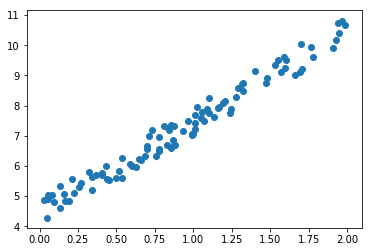

In [5]:
np.random.seed(2)

# generate 100 x values from 0 to 2 randomly, then sort them in ascending order
X = 2 * np.random.rand(100, 1)
X.sort(axis=0)

# generate y values and add noise to it
y = 4 + 3 * X + np.random.rand(100, 1)

# let us plot the data
plt.scatter(X, y)

In [8]:
# combine the x and y values into a single array called points
points = np.column_stack((X, y))

num_iterations = 100
learning_rate = 0.1
initial_w0 = 0 # initial y-intercept guess
initial_w1 = 0 # initial slope guess
early_stop = 0.00064
[w0, w1, mse] = gradient_descent_runner_early_stop(points, initial_w0, initial_w1, learning_rate, num_iterations, early_stop)

Iteration 1: w0=1.44691, w1=1.50194, mse=20.14308
Iteration 2: w0=2.32806, w1=2.39849, mse=7.47831
Iteration 3: w0=2.86801, w1=2.93046, mse=2.87255
Iteration 4: w0=3.20208, w1=3.24295, mse=1.19394
Iteration 5: w0=3.41183, w1=3.42341, mse=0.57873
Iteration 6: w0=3.54643, w1=3.52453, mse=0.35003
Iteration 7: w0=3.63550, w1=3.57805, mse=0.26199
Iteration 8: w0=3.69691, w1=3.60309, mse=0.22532
Iteration 9: w0=3.74143, w1=3.61118, mse=0.20757
Iteration 10: w0=3.77555, w1=3.60925, mse=0.19693
Iteration 11: w0=3.80321, w1=3.60148, mse=0.18912
Iteration 12: w0=3.82676, w1=3.59037, mse=0.18255
Iteration 13: w0=3.84765, w1=3.57743, mse=0.17664
Iteration 14: w0=3.86674, w1=3.56358, mse=0.17117
Iteration 15: w0=3.88456, w1=3.54934, mse=0.16604
Iteration 16: w0=3.90144, w1=3.53503, mse=0.16122
Iteration 17: w0=3.91758, w1=3.52085, mse=0.15667
Iteration 18: w0=3.93309, w1=3.50690, mse=0.15238
Iteration 19: w0=3.94807, w1=3.49325, mse=0.14833
Iteration 20: w0=3.96257, w1=3.47992, mse=0.14451
Iteratio

## Exercise 1.1 <a class="anchor" id="exercise1_1"></a> 

In [7]:
# TODO:
# Paste your code below for the modified gradient_descent_runner_early_stop function
def gradient_descent_runner_early_stop(points, starting_w0, starting_w1, learning_rate, num_iterations, early_stop):
    w0 = starting_w0
    w1 = starting_w1
    mse_t0 = 1e4 # Set to a high number for case 0
    for i in range(num_iterations):
        w0, w1 = step_gradient(w0, w1, points, learning_rate)
        mse_t1 = compute_error_for_line_given_points(w0, w1, points)
        if(mse_t0 - mse_t1 < early_stop):
            break;
        else:
            print(f'Iteration {i+1}: w0={w0:0.5f}, w1={w1:0.5f}, mse={mse_t1:0.5f}')
            mse_t0 = mse_t1
    return [w0, w1, mse_t0]
# N.B.: Students who wish to do this exercise in R should implement this function in R themselves

## Exercise 1.2<a class="anchor" id="exercise1_2"></a> 
In the program above we had set the learning rate to 0.1. Using the original `gradient_descent_runner` function, first set the number of iterations to 100. Then try to run the code with two different values of learning rates:
1. a learning rate of 0.001
2. a learning rate of 1

Explain what you observe.

In [9]:
%%capture
num_iterations = 100
learning_rate = [1, 1e-3]
initial_w0 = 0 # initial y-intercept guess
initial_w1 = 0 # initial slope guess
for lr in learning_rate:
    print("---------------------" + "\n" + "Learning rate: " + str(lr))
    [w0, w1, mse] = gradient_descent_runner(points, initial_w0, initial_w1, lr, num_iterations)

##### TODO
> When learning rate is set to 1 the mse (drastically) increases. </br>
When learning rate is set to 0.001 the mse decreases, however it decreases slowly. </br>
Conclusion: Learning rate = 1 is too high, while learning rate = 0.001 is too low. 

## Exercise 1.3<a class="anchor" id="exercise1_3"></a> 

In [10]:
# TODO
# Write your solution here
shape = X.shape
obj_type = X.dtype
ones = np.ones((shape), obj_type)
X_ones = np.hstack((X, ones))

In [11]:
X_trans = X_ones.T

In [12]:
X_trans_times_X = X_trans.dot(X_ones)

In [13]:
from numpy.linalg import inv

In [14]:
X_T_times_X__inv = inv(X_trans_times_X)

In [15]:
w_hat = ((X_T_times_X__inv.dot(X_trans)).dot(y))

In [16]:
w_hat

array([[3.02129039],
       [4.45478709]])

> It seems like the values are more or less the same, so both methods obviously work. 

## Exercise 1.4<a class="anchor" id="exercise1_4"></a> 
To brush up your calculus skills, derive the partial derivate of MSE that has *L2* penalty term included in it. In other words, we want you compute the following partial derivatives:
$$
\frac{\partial}{\partial w_0} \left(\dfrac{1}{n} \sum_{i=1}^{n} [y_i - (w_1 x_i + w_0)]^2 + \lambda {w_0}^2\right) 
$$

$$
\frac{\partial}{\partial w_1} \left(\dfrac{1}{n} \sum_{i=1}^{n} [y_i - (w_1 x_i + w_0)]^2 + \lambda {w_1}^2\right) 
$$

#### What to submit
A derivation of both the gradient equations. 

$$
\frac{\partial}{\partial w_0} \left(\dfrac{1}{n} \sum_{i=1}^{n} [y_i - (w_1 x_i + w_0)]^2  + \lambda \cdot {w_0}^2 \right) =
\underline{-\dfrac{2}{n}\sum_{i=1}^{n} \left(y_i - (w_1 x_i + w_0) + 2 \lambda w_0 \right)}
$$

$$
\frac{\partial}{\partial w_1} \left(\dfrac{1}{n} \sum_{i=1}^{n} [y_i - (w_1 x_i + w_0)]^2  + \lambda \cdot {w_1}^2 \right) =
\underline{-\dfrac{2}{n} \sum_{i=1}^{n} x_i\left (y_i - (w_1 x_i + w_0)\right) + 2 \lambda w_1}
$$

# Linear Regression with *sklearn* Machine Learning Library

In [17]:
# import LinearRegression class from sklearn.linear_model module
from sklearn.linear_model import LinearRegression

# make a lin_reg object form the LinearRegression class
lin_reg = LinearRegression()

# use the fit method of LinearRegression class to fit a straight line through the data
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
print('slope w1:', lin_reg.coef_)
print('y-intercept w0:', lin_reg.intercept_)

slope w1: [[3.02129039]]
y-intercept w0: [4.45478709]


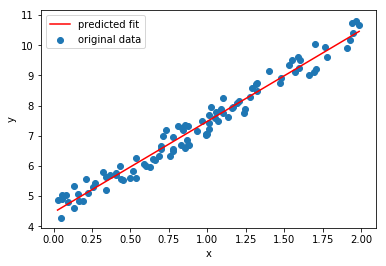

In [19]:
# plot the original data points as a scatter plot
plt.scatter(X, y, label='original data')

# plot the line that fits these points. Use the values of m and b as provided by the fit method
y_ = lin_reg.coef_*X + lin_reg.intercept_

# you can also get y_ by using the predict method. Uncomment the line below:
#y_ = lin_reg.predict(X)

plt.plot(X, y_, color='r', label='predicted fit')
plt.xlabel('x'); plt.ylabel('y')
plt.legend(loc='best')


## Exercise 1.5<a class="anchor" id="exercise1_5"></a> 

1. The _fit_ method from the __sklearn library__ seems to give more or less the same values for _b_ and _m_ as "my" implementation of the __Normal Equation__


In [20]:
# Answer to 2. 
test_data_point = 3
pred_value = float(lin_reg.predict(test_data_point))
actual_value = 4 + 3*test_data_point
print("Predicted value: " + str(pred_value) + '\n' + "Actual value: " + str(actual_value))

Predicted value: 13.518658256328946
Actual value: 13


> Pretty fair prediction

# 2. Multivariate Linear Regression <a class="anchor" id="multivariate"></a> 

In [21]:
# make a dataframe of the data
df = pd.read_csv('movies.csv')

# show first five rows of df
df.head(n=5)

,revenue,production_cost,promotional_cost,book_sales
0,85.099998,8.5,5.100000,4.7
1,106.300003,12.9,5.800000,8.8
2,50.200001,5.2,2.100000,15.1
3,130.600006,10.7,8.399999,12.2
4,54.799999,3.1,2.900000,10.6


In [22]:
# Extract the first column and set it to the output or dependent varaible y
y = df[['revenue']]

# Remove the first column and set the rest of the dataframe to X. This is the set of indepedent variables
X = df.drop(columns=['revenue'])

# show first five rows of X
X.head(n=5)

,production_cost,promotional_cost,book_sales
0,8.5,5.100000,4.7
1,12.9,5.800000,8.8
2,5.2,2.100000,15.1
3,10.7,8.399999,12.2
4,3.1,2.900000,10.6


In [23]:
# show first five rows of y
y.head(n=5)

,revenue
0,85.099998
1,106.300003
2,50.200001
3,130.600006
4,54.799999


In [24]:
from sklearn.linear_model import LinearRegression

# make a lin_reg object form the LinearRegression class
lin_reg = LinearRegression()

# use the fit method of LinearRegression class to fit a straight line through the data
lin_reg.fit(X, y)

# Display the learned parameters
lin_reg.intercept_, lin_reg.coef_

(array([7.67602854]), array([[3.66160401, 7.62105126, 0.82846807]]))

## Exercise 2.1<a class="anchor" id="exercise2_1"></a> 

In [25]:
## TODO
## Write your code here
prod_c = 23
prom_c = 12
book_s = 10
X_test = np.array([prod_c, prom_c, book_s]).reshape(1, -1)
lin_reg.predict(X_test)

array([[191.6302165]])

# Multivariate Regression with Polynomial basis

In [26]:
# define the number of points to generate as k
k = 100

# define a seed value. It is important to define the seed value
# so that the random numbers generated are the same every time
# this code is executed.
np.random.seed(10)

# generate k x-axis values from -3 to +3
X = 6 * np.random.rand(k, 1) - 3

# sort the numbers in ascending order. This helps when we are plotting the data. 
# Without this line, your plots will be all jumbled up
X.sort(axis=0)

# generate k y-axis values
y = 0.5 * X**2 + X + 2 + np.random.rand(k, 1)

Let us now plot the data:

Text(0,0.5,'y')

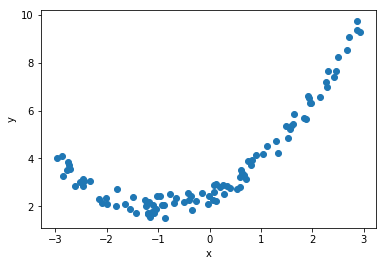

In [27]:
plt.scatter(X, y)
plt.xlabel('x'); plt.ylabel('y')

In [28]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=15, include_bias=False)

# generate polyonimal features upto degree 2 from the vector X
X_poly = poly_features.fit_transform(X)

In [29]:
# display 4 original data points 
X[1:5]

array([[-2.8754883 ],
       [-2.84760131],
       [-2.7643094 ],
       [-2.76024475]])

In [30]:
# Display the transformed data.
# You will now see the original X data alongside its corresponding 2nd-degree polynomial feature
X_poly[1:5]

array([[-2.87548830e+00,  8.26843299e+00, -2.37757823e+01,
         6.83669840e+01, -1.96588463e+02,  5.65287826e+02,
        -1.62547853e+03,  4.67404451e+03, -1.34401603e+04,
         3.86470238e+04, -1.11129065e+05,  3.19550326e+05,
        -9.18863225e+05,  2.64218046e+06, -7.59755900e+06],
       [-2.84760131e+00,  8.10883321e+00, -2.30907240e+01,
         6.57531760e+01, -1.87238830e+02,  5.33181537e+02,
        -1.51828844e+03,  4.32348015e+03, -1.23115477e+04,
         3.50583794e+04, -9.98322871e+04,  2.84282551e+05,
        -8.09523365e+05,  2.30519979e+06, -6.56428994e+06],
       [-2.76430940e+00,  7.64140644e+00, -2.11232116e+01,
         5.83910924e+01, -1.61411045e+02,  4.46190069e+02,
        -1.23340740e+03,  3.40951967e+03, -9.42496726e+03,
         2.60535256e+04, -7.20200055e+04,  1.99085578e+05,
        -5.50334134e+05,  1.52129382e+06, -4.20532680e+06],
       [-2.76024475e+00,  7.61895107e+00, -2.10301697e+01,
         5.80484154e+01, -1.60227834e+02,  4.42268036

In [31]:
lin_reg = LinearRegression()

# Now we fit a linear model to the X_poly (the transformed features set) and y
lin_reg.fit(X_poly, y)

# show the values of intercept and learned co-efficients
lin_reg.intercept_, lin_reg.coef_

(array([2.43771889]),
 array([[ 4.70240062e-01,  9.81483416e-01,  1.45901724e+00,
         -5.43920910e-01, -1.30913386e+00,  2.30186856e-01,
          5.62777734e-01, -4.49943278e-02, -1.28760085e-01,
          3.53201168e-03,  1.58848833e-02,  1.15315775e-05,
         -9.84782281e-04, -1.01041607e-05,  2.36325364e-05]]))

Text(0,0.5,'y')

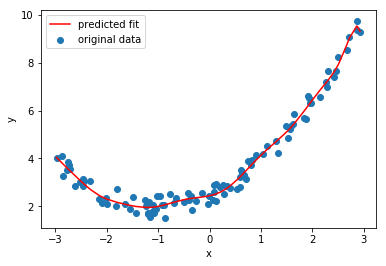

In [32]:
y_ = lin_reg.predict(X_poly)
    
plt.scatter(X, y, label='original data')
plt.plot(X, y_, color='r', label='predicted fit')
plt.legend(loc='best')

plt.xlabel('x')
plt.ylabel('y')

### Regularization with Ridge Penalty

C:\Users\Sindr\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.211483e-17
  overwrite_a=True).T


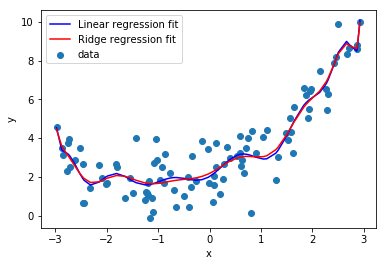

In [33]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# define the number of points to generate
k = 100
np.random.seed(10)

# generate k x-axis values from -3 to +3
X = 6 * np.random.rand(k, 1) - 3
X.sort(axis=0)

# generate k y-axis values
y = 0.5 * X**2 + X + 2 + np.random.randn(k, 1)

# Create polynomial feature (degree 15)
poly_features = PolynomialFeatures(degree=15, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Create Ridge regression object from Ridge class
ridge_reg = Ridge(alpha=5e-2)
# Fit data using Ridge regression
ridge_reg.fit(X_poly, y)

# Create Linear regression object from LinearRegress class (this is just for comparison)
lin_reg = LinearRegression()
# Fit data using Linear regression
lin_reg.fit(X_poly, y)

y_predict_ridge = ridge_reg.predict(X_poly)
y_predict_linear = lin_reg.predict(X_poly)

plt.scatter(X, y, label='data')
plt.plot(X, y_predict_linear, color='b', label='Linear regression fit')
plt.plot(X, y_predict_ridge, color='r', label='Ridge regression fit')

plt.xlabel('x')
plt.ylabel('y')

plt.legend(loc='best')

## Exercise 2.2<a class="anchor" id="exercise2_2"></a> 

##### TODO
> Observing that when changing(/decreasing) the __regularization parameter__ the model starts overfitting


# Linear Regression with Radial Basis Functions

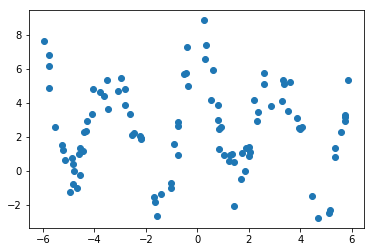

In [34]:
# Set random seed
np.random.seed(0)
m = 100

# Create random set of m x values between -6 and +6
X = np.random.rand(m, 1)*12 - 6
X.sort(axis =0)

# Create a non-linear dataset with random noise
y = 0.5*np.cos(X) + np.sin(X) + 4*np.cos(2*X) + np.exp(np.cos(3*X)) + 3*np.random.rand(m,1) 

# plot it
plt.scatter(X, y)

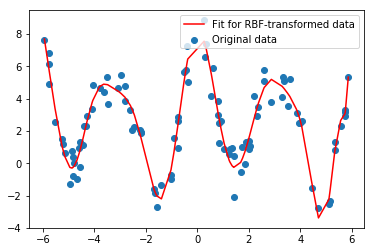

In [35]:
from sklearn.metrics.pairwise import rbf_kernel 
from sklearn.linear_model import LinearRegression

# find the transformation of X using Radial Basis Functions 
# Each point in X is now modeled as vector of 100 values. 
# See the X_RBF.shape and X_RBF to find how rbf_kernel transformed 
# the original datapoints
X_RBF = rbf_kernel(X, X, gamma=0.1) 

# Fit a linear regression model to the RBF-transformed data
clf = LinearRegression()
clf.fit(X_RBF, y)

# find the predicted values
y_= clf.predict(X_RBF)

# plot original data and predicted fit
plt.scatter(X, y, label='Original data')
plt.plot(X, y_, color='r', label='Fit for RBF-transformed data')
plt.legend(loc='best')

## Exercise 2.3<a class="anchor" id="exercise2_3"></a> 

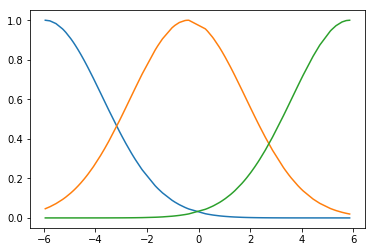

In [36]:
# TODO
# Paste your solution here
X_RBF_0th = X_RBF[0]
X_RBF_49th = X_RBF[49]
X_RBF_99th = X_RBF[99]
ans = np.array([X_RBF_0th, X_RBF_49th, X_RBF_99th])

plt.plot(X, ans.T)
plt.show()

# 3. Logistic Regression <a class="anchor" id="logistic"></a> 

In [37]:
from sklearn import datasets
iris = datasets.load_iris()

# iris is a dictionary of key-value pairs. Each key-value pairs contains some information about the dataset.
# Lets display a list of these keys and see what they hold
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [38]:
# let us get the petal width. It is present in the 4th column of data
X = iris["data"][:, 3:] 
X.sort(axis=0)

# lets define a binaray variable that encodes whether a flower is Iris-Virginca or not
# Iris_virginca flower is encoded as a 2 in target  
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

Text(0,0.5,'Iris-Virginica(1) \n Not Iris-Virginica(0)')

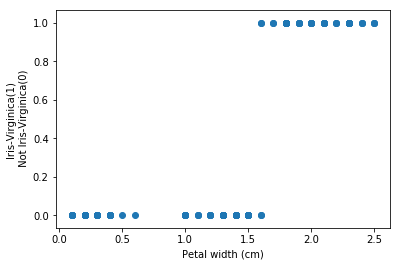

In [39]:
plt.scatter(X, y)
plt.xlabel('Petal width (cm)')
plt.ylabel('Iris-Virginica(1) \n Not Iris-Virginica(0)')

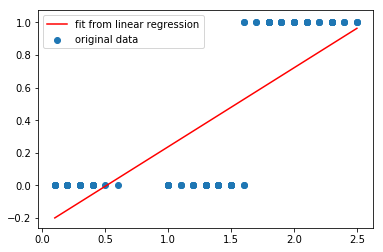

In [40]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_ = lin_reg.predict(X)

plt.scatter(X, y, label='original data')
plt.plot(X, y_, color='r', label='fit from linear regression')
plt.legend(loc='best')

In [41]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

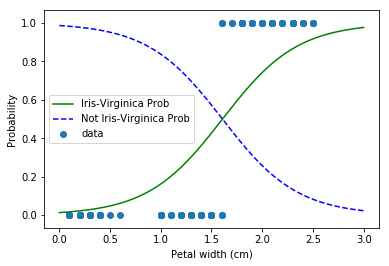

In [42]:
# we generate X_new which is vector of closely spaced points form 0 to 3
# This vector will help us plot the model
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)

# make a vector of prediction probablity values for all datapoints in X_new
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica Prob")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica Prob")
plt.scatter(X, y, label='data')

plt.xlabel('Petal width (cm)')
plt.ylabel('Probability')
plt.legend(loc='best')

In [43]:
log_reg.predict([[1.7]])

array([1])

In [44]:
log_reg.predict_proba([[1.7]])

array([[0.43834057, 0.56165943]])

## Exercise 3.1<a class="anchor" id="exercise3_1"></a> 

In [45]:
multiclass_logreg_obj = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
# let us get the petal width. It is present in the 4th column of data
X = iris["data"][:, [2,3]] 
y = iris["target"]

In [46]:
print(X.shape)
print(y.shape)

(150, 2)
(150,)


In [47]:
df = pd.DataFrame(X, columns=[iris.feature_names[2], iris.feature_names[3]])

In [48]:
print(df.head())

   petal length (cm)  petal width (cm)
0                1.4               0.1
1                1.4               0.1
2                1.3               0.1
3                1.5               0.1
4                1.4               0.1


In [49]:
multiclass_logreg_obj.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [69]:
X_new = np.array([1, 0.1], ndmin=2)
prediction = multiclass_logreg_obj.predict(X_new)
pred_class = prediction[0]
pred_prob = multiclass_logreg_obj.predict_proba(X_new)
pred_prob_class = (pred_prob[0][pred_class])
print('Prediction {}'.format(prediction) + ', with a probability of: {}'.format(pred_prob_class))

Prediction [0], with a probability of: 0.9995796959204409
